In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr

In [125]:
df = pd.read_csv('data/metric_means.csv')
print(df.describe())

       Unnamed: 0    n_geese  normalized_velocity_alignment  \
count   76.000000  76.000000                      74.000000   
mean    37.500000  25.381579                       0.998261   
std     22.083176  13.934099                       0.002501   
min      0.000000   3.000000                       0.980785   
25%     18.750000  15.000000                       0.997970   
50%     37.500000  23.500000                       0.998769   
75%     56.250000  35.500000                       0.999661   
max     75.000000  61.000000                       0.999961   

       velocity_deviation  sidewise_acceleration_deviation  \
count           74.000000                        74.000000   
mean             0.847963                         1.408321   
std              0.500782                         0.577780   
min              0.152738                         0.259887   
25%              0.411414                         0.863562   
50%              0.847357                         1.442593  

In [126]:
df = df[df['normalized_velocity_alignment'] > 0.9825]

In [127]:
def show_correlation(df: pd.DataFrame, feature_1: str, feature_2: str):
    
    fig = plt.figure(figsize=(7, 7))
    sns.regplot(df,
    x=feature_1,
    y=feature_2,
    )

    r, p = pearsonr(df[feature_1], df[feature_2])
    print(r, p)
    r, p = np.round((r, p), 3)
    plt.title(f"Regression plot: {feature_1} vs {feature_2} (r={r}, p={p})")

    plt.grid(color='lightgrey')
    plt.tight_layout()
    plt.show()
    

In [128]:
features = [
        "n_geese",
        "normalized_velocity_alignment",
        "velocity_deviation",
        "sidewise_acceleration_deviation",
        "longitudinal_acceleration_deviation",]

0.5035306519252516 5.602240771255273e-06


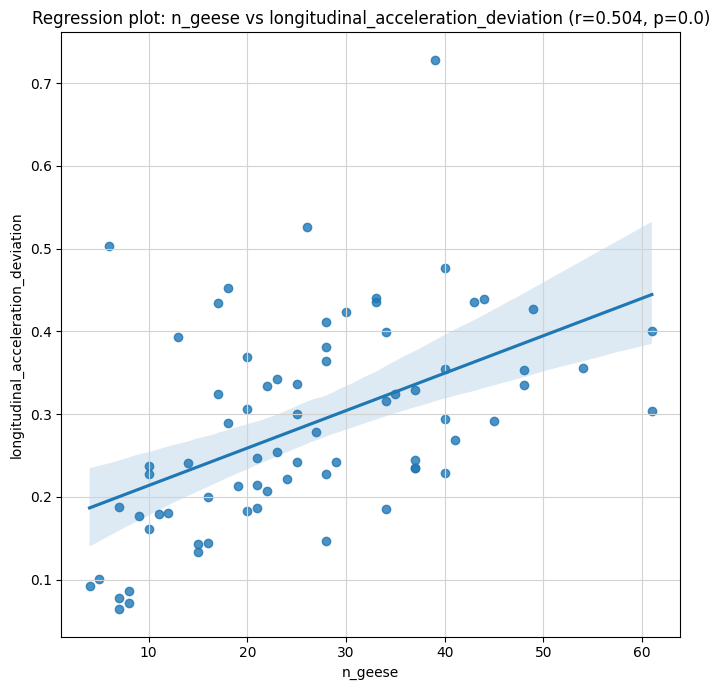

In [131]:
show_correlation(df, features[0], features[4])